# Load and import the libraries needed

In [1]:
from __future__ import division, unicode_literals, print_function

import os
import sys
import argparse
import matplotlib.pyplot as mpl
import numpy as np
import astropy.io.fits as pyfits
import skimage.morphology as morph
import skimage.exposure as skie
from contextlib import suppress
import skimage.io
from scipy import ndimage
from astropy.table import Table

#Initialize seed for code reproducibility
seed=42
def define_seed(seed):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
#import python astronomy and astrophysics package    
from astropy.io import fits

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Access the PrimaryHDU of the image, through AstroPy way

In [2]:
image_file='c4d_131207_031640_ooi_g_d1.002.fits_d1.SE.APERTURES.fits'
hdu=fits.open(image_file)
hdu_prim=hdu[0].data
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4094, 2046)


# Extract the coordinates of the most intense pixel in the image

In [3]:
#creates a new image using an mapping arc sinh that captures the full dynamic range effectively
#It locates lower and upper bounds that should include only stars
#The parameters would probably have to be refined to optimize the extraction of stars from background
limg = np.arcsinh(image_data)
limg = limg / limg.max()
low = np.percentile(limg, 0.25)
high = np.percentile(limg, 99.5)
opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high))
#Here we need to return a boolean array of the point that are on the loca maximum, as True and False
lm =morph.local_maxima(limg)

x1, y1 = np.where(lm.T == True)
v = limg[(y1,x1)]
lim = 0.7
x2, y2 = x1[v > lim], y1[v > lim]

/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:278: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):
/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:111: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):


In [4]:
print("These are the values of x2: {}".format(x2))
np.savetxt("x_coordinate.csv", x2, delimiter=",")
print(x2.shape)

print("These are the values of y2: {}".format(y2))
np.savetxt("y_coordinate.csv", y2, delimiter=",")
print(y2.shape)

These are the values of x2: [  23   46   51  111  117  119  122  125  126  128  129  131  131  132
  134  136  137  138  138  139  140  143  144  213  235  236  296  319
  322  327  329  369  393  440  454  599  654  662  679  681  682  683
  684  686  688  688  692  693  695  695  695  695  696  697  699  699
  700  701  703  718  720  720  722  725  727  729  753  755  757  760
  763  765  876  902  938  971 1015 1029 1035 1162 1241 1279 1288 1359
 1494 1501 1534 1541 1550 1639 1646 1647 1647 1653 1656 1707 1731 1738
 1818 1822 1824 1852 1967 1971 1971 1974 1975 1975 1987 1987 1993 1995
 2044 2045 2045 2045 2045]
(117,)
These are the values of y2: [2539 2276 2271 1725  853  853  855  846  856  856  846  846  864  857
  850  862  847  856  863  846  856  865  856  931 3551 2102  838  730
  731  731  731 1367 2068   14  870 3688 1603 2967 3538 3538 3542 3538
 3542 3538 3538 3544 3543 3538 1829 1837 3543 3547 3538 3543 1833 3548
 3543 3549 3543 1141 1141 1144 1144 1144 1144 1144 3296 32

# Visualize these coordinates on a Scatter Plot

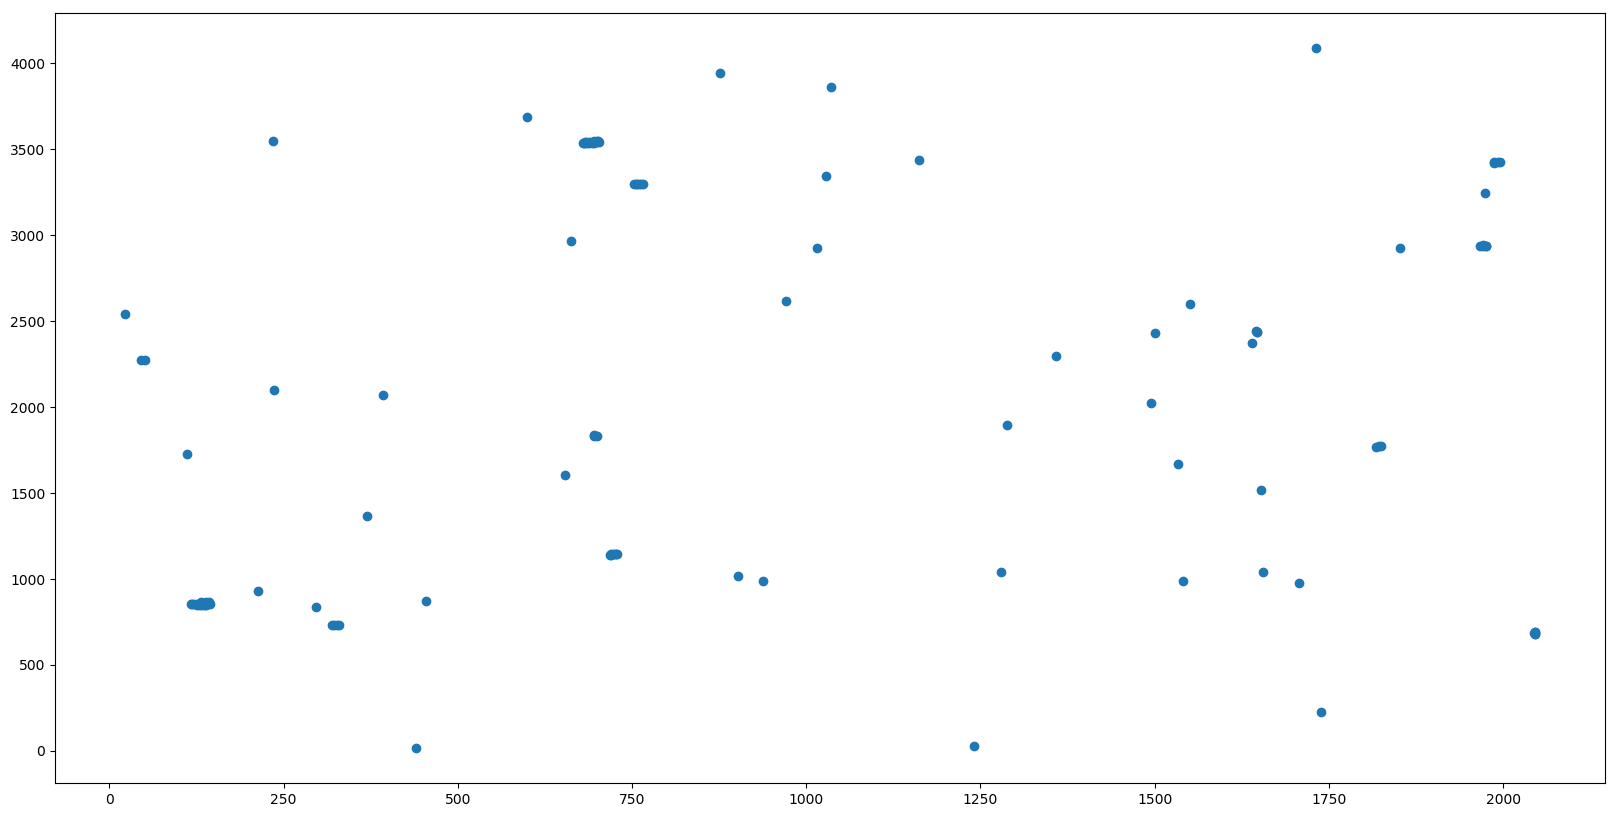

In [5]:
#Plot all these cpprdinate points as scatter plot
plt.figure(figsize=(20,10))
plt.scatter(x2,y2)
plt.show()

# Join X and Y coordinates into one 2-D array and save them

In [6]:
#First convert the corrdinate to an iteger or slices
points=list(zip(x2, y2))
print("The Dimension of this array is: {}".format(np.shape(points)))

The Dimension of this array is: (117, 2)


In [7]:
#Secondly convert these intergers to an array
points=np.array(points)
print('The dimension of this array is: {}'.format(points.shape))

The dimension of this array is: (117, 2)


In [8]:
points_coord=np.savetxt("image_coord.csv", points, delimiter=",")

# Plot these coordinates on the image with circle or square box using AplPy way.

INFO: Auto-setting vmin to  1.357e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.521e+02 [aplpy.core]


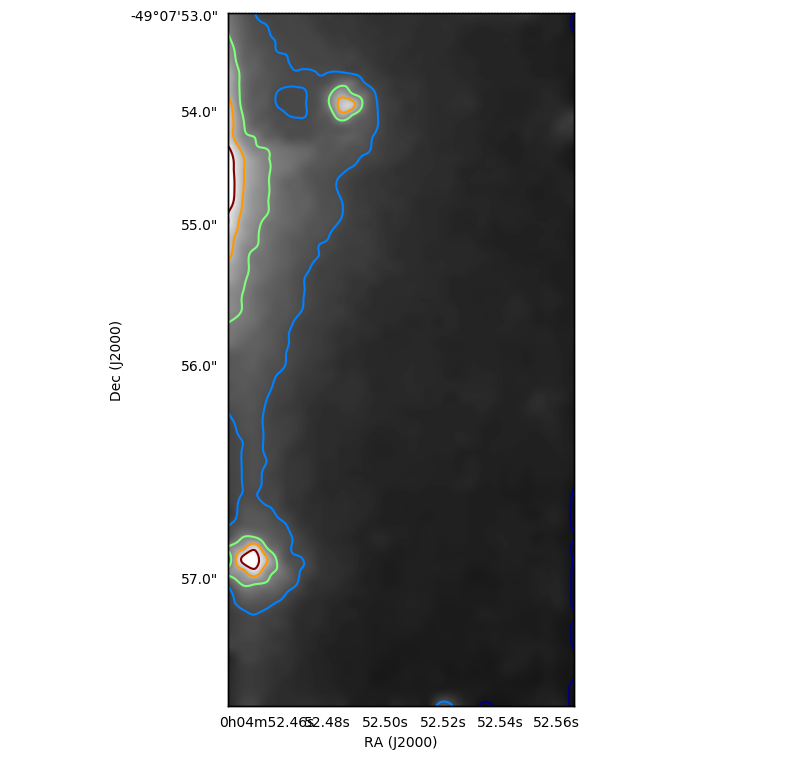

In [58]:
import aplpy
gc=aplpy.FITSFigure('c4d_131207_031640_ooi_g_d1.002.fits_d1.SE.BACKGROUND.fits')
gc.show_contour()
gc.tick_labels.show()
gc.show_grayscale()

In [34]:
import numpy as np
raw_data="image_coord.csv"
data = np.loadtxt(raw_data, delimiter=",")
ra, dec = data[:, 0], data[:, 1]
gc.show_markers(ra, dec, edgecolor='red', facecolor='none',
                marker='o', s=80, alpha=8)

gc.list_layers()
gc.show_markers(ra, dec, layer='marker_set_1', edgecolor='red',
                facecolor='none', marker='o', s=80, alpha=2)

#save the plot
gc.save('myfirstplot.png')


  There are 21 layers in this figure:

   -> marker_set_2
   -> marker_set_4
   -> marker_set_5
   -> marker_set_6
   -> marker_set_3
   -> marker_set_7
   -> marker_set_8
   -> marker_set_9
   -> marker_set_10
   -> marker_set_11
   -> marker_set_12
   -> marker_set_13
   -> marker_set_14
   -> marker_set_15
   -> marker_set_16
   -> marker_set_17
   -> marker_set_18
   -> marker_set_19
   -> marker_set_20
   -> marker_set_1
   -> marker_set_21


# Image is already saved in the working directory showing all the data needed